<a href="https://colab.research.google.com/github/Yun-8bit/Assignment-3-Week-/blob/main/6%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 1. 전처리

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv')
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#2. 경사하강법

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w):
    m = len(y)
    h = sigmoid(np.dot(X, w))
    epsilon = 1e-5
    cost = -1/m * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

def gradient_descent(X, y, lr=0.01, iterations=10000):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]  # bias 추가
    w = np.zeros(n + 1)
    for _ in range(iterations):
        z = np.dot(X_b, w)
        h = sigmoid(z)
        gradient = np.dot(X_b.T, (h - y)) / m
        w -= lr * gradient
    return w

weights = gradient_descent(X_train, y_train)
print('경사하강법 학습 파라미터:', weights)

경사하강법 학습 파라미터: [-1.0887985   2.14248013  1.19179122]


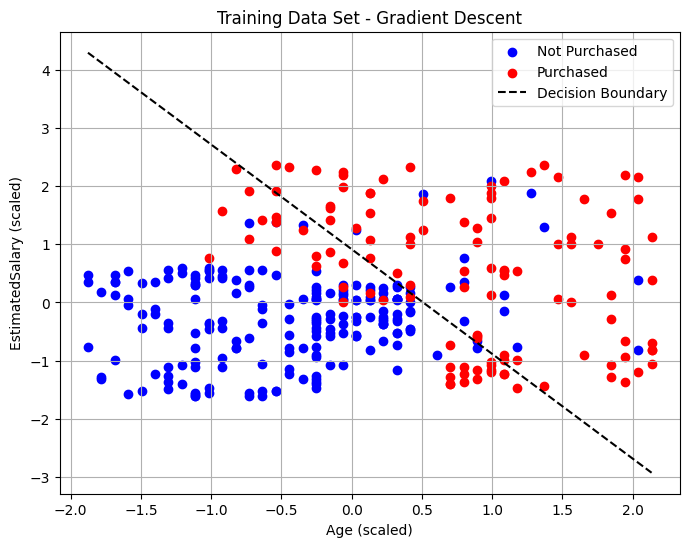

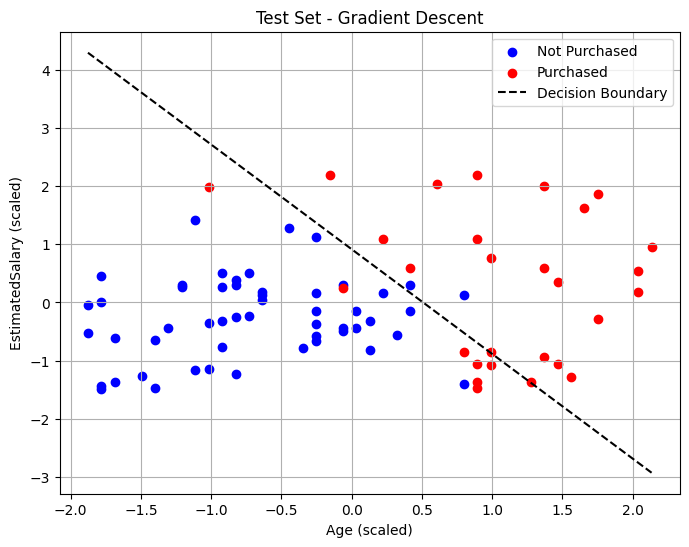

In [15]:
def plot_decision_boundary(X, y, w, title):
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2 = -(w[0] + w[1]*x1) / w[2]
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y==0][:,0], X[y==0][:,1], c='b', label='Not Purchased')
    plt.scatter(X[y==1][:,0], X[y==1][:,1], c='r', label='Purchased')
    plt.plot(x1, x2, 'k--', label='Decision Boundary')
    plt.xlabel('Age (scaled)')
    plt.ylabel('EstimatedSalary (scaled)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(X_train, y_train, weights, 'Training Data Set - Gradient Descent')
plot_decision_boundary(X_test, y_test, weights, 'Test Set - Gradient Descent')

## 3. scikit-learn

In [16]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
print('sklearn 파라미터:', clf.intercept_, clf.coef_)

#로지스틱회귀로 얻은 예측값(y_pred)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('정확도:', acc)

sklearn 파라미터: [-1.0529134] [[2.01253849 1.12322093]]
정확도: 0.8625


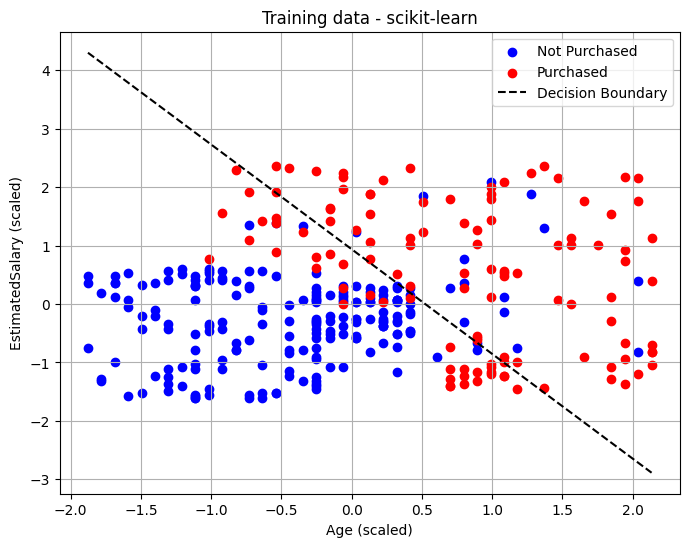

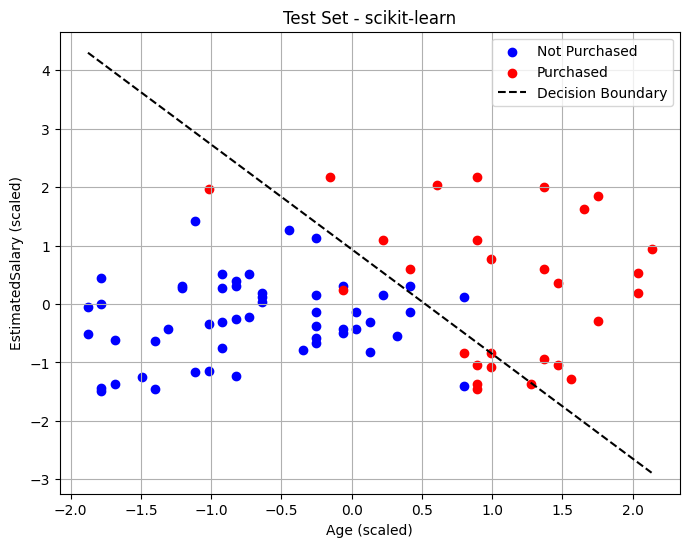

In [17]:
plot_decision_boundary(X_train, y_train, np.concatenate([clf.intercept_, clf.coef_.flatten()]), 'Training Data Set - scikit-learn')
plot_decision_boundary(X_test, y_test, np.concatenate([clf.intercept_, clf.coef_.flatten()]), 'Test Set - scikit-learn')